# 1. Reza

In [8]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import svm
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
df = pd.read_csv("sample_data/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=pd.to_datetime(df["Date"]).dt.year
df['Month']=pd.to_datetime(df["Date"]).dt.month
df['Weekday Name']=df["Date"].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Weekday Name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,Friday


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [15]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
Weekday Name               0
dtype: int64

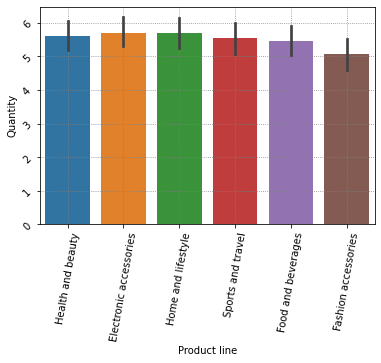

In [16]:
sns.barplot(x="Product line",y="Quantity", data=df)
plt.xticks(rotation=80)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

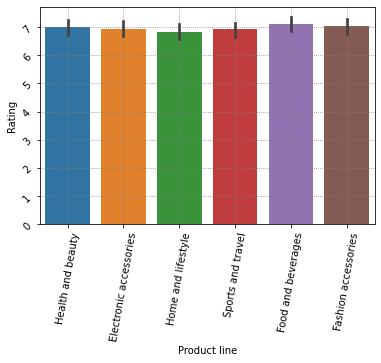

In [17]:
sns.barplot(x="Product line",y="Rating", data=df)
plt.xticks(rotation=80)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

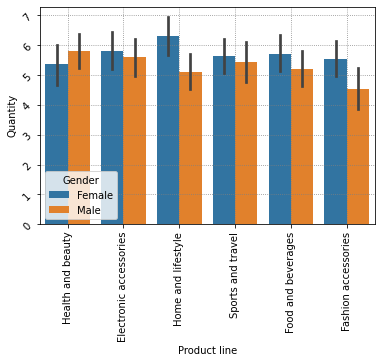

In [18]:
sns.barplot(x="Product line", y="Quantity", hue="Gender", data=df)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

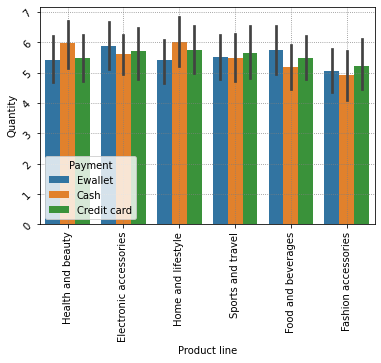

In [19]:
sns.barplot(x="Product line", y="Quantity", hue="Payment", data=df)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

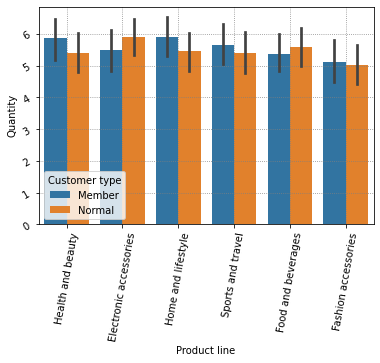

In [20]:
sns.barplot(x="Product line",y="Quantity", hue="Customer type",data=df)
plt.xticks(rotation=80)
plt.yticks(rotation=30)
plt.grid(ls=':', color='grey')
plt.show()

# 2. Perwira

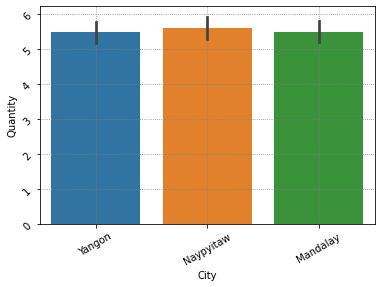

In [21]:
sns.barplot(x="City",y="Quantity", data=df)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

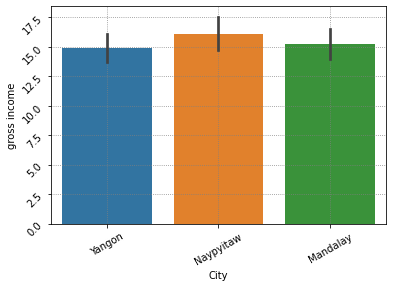

In [22]:
sns.barplot(x="City",y="gross income", data=df)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.grid(ls=':', color='grey')
plt.show()

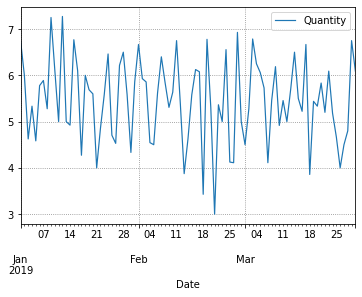

In [23]:
std_value=df[["Quantity"]].groupby(df["Date"]).mean()
std_value.plot(linewidth=1.2);
plt.grid(ls=':', color='grey')

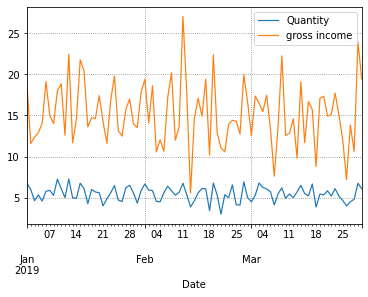

In [24]:
std_value2=df[["Quantity", "gross income"]].groupby(df["Date"]).mean()
std_value2.plot(linewidth=1.2);
plt.grid(ls=':', color='grey')

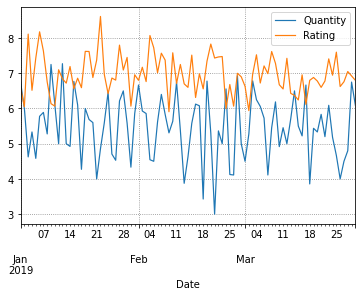

In [25]:
std_value3=df[["Quantity", "Rating"]].groupby(df["Date"]).mean()
std_value3.plot(linewidth=1.2);
plt.grid(ls=':', color='grey')

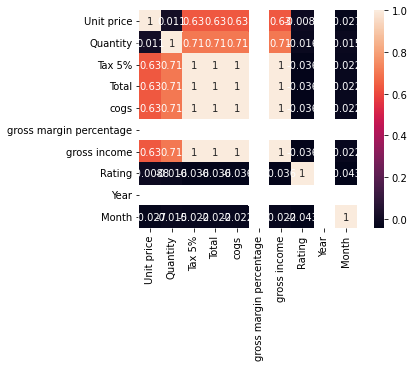

In [26]:
# Plotting heatmap 
sns.heatmap(df.corr(), square=True, annot=True)

In [28]:
df.corr() # Terdapat korelasi quantity dan unit price sebesar 0,01 sehingga berbanding terbalik.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,NaN,-0.027387
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,NaN,-0.014524
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,NaN,-0.042880
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,NaN,1.000000


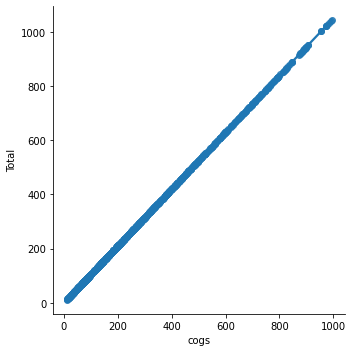

In [29]:
sns.lmplot(x = 'cogs', y = 'Total', data=df)

In [30]:
X = df[['Unit price', 'cogs', 'Total', 'gross income']].to_numpy()
y = df['Quantity'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X adalah variabel independen dan y adalah variabel target atau output.

test_size adalah proporsi data yang akan kita gunakan untuk testing. 0.3 artinya, kita menggunakan 30% data kita untuk testing (70% nya digunakan untuk training).

random_size digunakan untuk me-random data sebanyak yang kita tentukan.

# 3. Willi

## Trade-off

In [31]:
model1 = svm.SVC()
model2 = LinearRegression()
model3 = KNeighborsClassifier()
model4 = GaussianNB()

In [32]:
from sklearn.metrics import mean_squared_error

mse1, bias1, var1 = bias_variance_decomp(model1, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse2, bias2, var2 = bias_variance_decomp(model2, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse3, bias3, var3 = bias_variance_decomp(model3, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
mse4, bias4, var4 = bias_variance_decomp(model4, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)

print("=SVM=")

print("MSE: %.3f" % mse1)
print("Bias: %.3f" % bias1)
print("Variance: %.3f" % var1)

print("=LINEAR=")

print("MSE: %.3f" % mse2)
print("Bias: %.3f" % bias2)
print("Variance: %.3f" % var2)

print("=KNN=")

print("MSE: %.3f" % mse3)
print("Bias: %.3f" % bias3)
print("Variance: %.3f" % var3)

print("=NB=")

print("MSE: %.3f" % mse4)
print("Bias: %.3f" % bias4)
print("Variance: %.3f" % var4)

=SVM=
MSE: 4.563
Bias: 4.204
Variance: 0.359
=LINEAR=
MSE: 1.386
Bias: 1.376
Variance: 0.010
=KNN=
MSE: 0.879
Bias: 0.368
Variance: 0.511
=NB=
MSE: 5.237
Bias: 5.041
Variance: 0.196


In [34]:
X = df[['Unit price', 'cogs', 'Total', 'gross income']].to_numpy()
y = df['Quantity'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model1 = svm.SVC()
dataset = {
    "random_state": [], 
    "mse": [],
    "bias": [],
    "variance": []
}
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mse, bias, var = bias_variance_decomp(model1, X_train, y_train, X_test, y_test, loss="mse", random_seed=100)
    dataset['random_state'].append(i)
    dataset['mse'].append(mse)
    dataset['bias'].append(bias) 
    dataset['variance'].append(var)
    
df = pd.DataFrame(dataset)
df

,random_state,mse,bias,variance
0,1,4.979917,4.451809,0.528108
1,2,6.158233,5.803934,0.354299
2,3,6.716483,6.407827,0.308656
3,4,5.389883,5.066825,0.323058
4,5,5.186650,4.861388,0.325262
5,6,5.388733,5.065378,0.323356
6,7,5.225100,4.723636,0.501464
7,8,5.195000,4.617534,0.577466
8,9,5.648250,5.188693,0.459557
9,10,4.563167,4.204340,0.358827


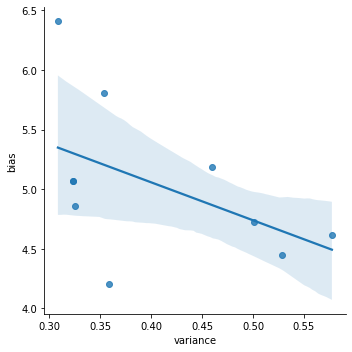

In [35]:
# Create lmplot
sns.lmplot(x='variance', y='bias', data=df)

# Show figure
plt.show()

# 4. Serly

## Cross-validation

In [36]:
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(svm.SVC(kernel="linear"), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[1. 1. 1. 1. 1.]
Rata:  100.0 %


In [37]:
score_cv = cross_val_score(LinearRegression(), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.81798515 0.78085144 0.80461217 0.84759487 0.8118059 ]
Rata:  81.25699038857223 %


In [38]:
score_cv = cross_val_score(KNeighborsClassifier(n_neighbors=6), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.585 0.65  0.635 0.65  0.67 ]
Rata:  63.800000000000004 %


In [39]:
score_cv = cross_val_score(GaussianNB(), X, y, cv=5)
print(score_cv)
print("Rata: ", score_cv.mean() * 100, "%")

[0.31  0.215 0.26  0.34  0.29 ]
Rata:  28.300000000000004 %


## Training Data

In [40]:
regressor = svm.SVC(kernel="linear")

In [41]:
regressor.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
y_predict = regressor.predict(X_test)

# Evaluasi Model

Buat memastikan model yang kita buat cukup akurat atau belum dalam memprediksi.

In [43]:
metrics.accuracy_score(y_test, y_predict) * 100

100.0

Score ada di rentangan (0%-100%). Semakin mendekati 100, semakin akurat model yang kita bangun.

Score yang kita peroleh memiliki akurasi sebesar 100% dan cukup akurat.

Jika kita menggunakan lebih dari satu variabel independen, akurasinya bisa lebih baik.

# Gradio

In [44]:
regressor.coef_, regressor.intercept_

(array([[ 1.66182671e-01, -7.89414997e-02, -8.28885747e-02,
         -3.94707498e-03],
        [ 9.44077298e-02, -4.48461674e-02, -4.70884757e-02,
         -2.24230837e-03],
        [ 4.83672833e-02, -2.29720419e-02, -2.41206440e-02,
         -1.14860210e-03],
        [ 4.92031263e-02, -2.33706743e-02, -2.45392080e-02,
         -1.16853372e-03],
        [ 3.49923307e-02, -1.66205544e-02, -1.74515822e-02,
         -8.31027722e-04],
        [ 3.29016775e-02, -1.56263550e-02, -1.64076727e-02,
         -7.81317749e-04],
        [ 2.80718379e-02, -1.33357924e-02, -1.40025820e-02,
         -6.66789618e-04],
        [ 2.03449626e-02, -9.66115624e-03, -1.01442141e-02,
         -4.83057812e-04],
        [ 2.02764185e-02, -9.62932892e-03, -1.01107954e-02,
         -4.81466446e-04],
        [ 3.77567169e-01, -8.96811014e-02, -9.41651564e-02,
         -4.48405507e-03],
        [ 1.45082328e-01, -3.44588440e-02, -3.61817862e-02,
         -1.72294220e-03],
        [ 1.31179737e-01, -3.11564978e-02, 

In [45]:
import gradio as gr

def predict(Unit_price, cogs, Total, gross_income):
  return regressor.predict([[Unit_price, cogs, Total, gross_income]])[0]

demo = gr.Interface(predict, 
                    [gr.Number(label="Unit price"), gr.Number(label="cogs"), gr.Number(label="Total"), gr.Number(label="gross income"),], 
                    gr.Number())

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://20121.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2adfe59590>,
 'http://127.0.0.1:7860/',
 'https://20121.gradio.app')